## Research Project.

### To develop this code, Python documentation, along with its libraries, were used. The full reference for each library can be found on the reference list that this notebook supports.

### Reading in the dataset and performing basic preprocessing.

In [1]:
# Importing the necessary libraries. 
# (Harris et al., 2020)
import numpy as np
# (Van Rossum and Drake, 1995).
import os
from datetime import datetime, timedelta
import glob
import matplotlib.pyplot as plt
import seaborn as sns
# (McKinney, 2010)
import pandas as pd 
# (Pedregosa et al., 2011).
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, mean_absolute_percentage_error
# (Virtanen et al., 2020)
from scipy import stats 
# (Seabold and Perktold, 2010)
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
# (Abadi et al., 2015)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import MeanAbsoluteError
from collections import Counter
# (Chollet et al., 2015)
import kerastuner as kt


/var/folders/q_/jm4p9f797gq5fnf6dpfsplhc0000gn/T/ipykernel_1153/1227396310.py:34: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [2]:
# Checking the directory structure, as there were previous issues with reading it in.
data = r"/Users/hannahcourtney/Desktop/Research_Project/Jupyter_Notebook /weather_data"
print("Contents of the directory:")
print(os.listdir(data))

Contents of the directory:
['ROR19701.WTH', 'ROR19401.csv', 'ROR16901.csv', 'ROR17001.csv', 'ROR17301.WTH', 'ROR17201.csv', 'ROR17101.WTH', 'ROR16801.WTH', 'ROR19501.WTH', 'ROR19601.csv', 'ROR19201.csv', '.DS_Store', 'ROR19101.WTH', 'ROR18801.WTH', 'ROR17501.WTH', 'ROR17601.csv', 'ROR17701.WTH', 'ROR17401.csv', 'ROR18901.csv', 'ROR19001.csv', 'ROR19301.WTH', 'ROR17001.WTH', 'ROR17301.csv', 'ROR19701.csv', 'ROR16901.WTH', 'ROR19401.WTH', 'ROR19501.csv', 'ROR16801.csv', 'ROR19601.WTH', 'ROR17201.WTH', 'ROR17101.csv', 'ROR17501.csv', 'ROR18801.csv', 'ROR17601.WTH', 'ROR19201.WTH', 'ROR19101.csv', 'ROR19001.WTH', 'ROR19301.csv', 'ROR17701.csv', 'ROR18901.WTH', 'ROR17401.WTH', 'ROR18601.csv', 'ROR18501.WTH', 'ROR17801.WTH', 'ROR16101.WTH', 'ROR16201.csv', 'ROR16301.WTH', 'ROR16001.csv', 'ROR17901.csv', 'ROR18401.csv', 'ROR18701.WTH', 'ROR18301.WTH', 'ROR18001.csv', 'ROR19901.csv', 'ROR16401.csv', 'ROR16701.WTH', 'ROR15901.csv', 'ROR16601.csv', 'ROR16501.WTH', 'ROR19801.WTH', 'ROR18101.WTH',

In [3]:
# Reading in and merging the files into one dataset so that it can be easily analysed.
file_pattern = r"/Users/hannahcourtney/Desktop/Research_Project/Jupyter_Notebook /weather_data/ROR*.WTH"

all_files = glob.glob(file_pattern)

data_frames = []

for file in all_files:
    df = pd.read_csv(file, delim_whitespace=True, skiprows=5, names=['@DATE', 'SRAD', 'TMAX', 'TMIN', 'RAIN'])
    data_frames.append(df)
    
merged_data = pd.concat(data_frames, ignore_index=True)

print(merged_data)

       @DATE  SRAD  TMAX  TMIN  RAIN
0      97001   3.7  -2.1  -6.1   0.0
1      97002   5.4  -0.7  -5.9   0.0
2      97003   0.8  -0.4  -5.5   0.0
3      97004   1.0   0.6  -3.2   0.3
4      97005   1.7   1.2  -1.4   0.0
...      ...   ...   ...   ...   ...
14970  66361   3.2   5.9   2.5   0.0
14971  66362   0.8  10.1   0.0   3.0
14972  66363   0.9   7.2   4.2   5.2
14973  66364   3.1   7.3   0.5   0.2
14974  66365   1.5   7.3   1.1   2.8

[14975 rows x 5 columns]


/var/folders/q_/jm4p9f797gq5fnf6dpfsplhc0000gn/T/ipykernel_1153/2129230526.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, skiprows=5, names=['@DATE', 'SRAD', 'TMAX', 'TMIN', 'RAIN'])
/var/folders/q_/jm4p9f797gq5fnf6dpfsplhc0000gn/T/ipykernel_1153/2129230526.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, skiprows=5, names=['@DATE', 'SRAD', 'TMAX', 'TMIN', 'RAIN'])
/var/folders/q_/jm4p9f797gq5fnf6dpfsplhc0000gn/T/ipykernel_1153/2129230526.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, skiprows=5, names=['@DATE', 'SRAD', 'TMAX', 'TMIN', 'RAIN'])
/var

In [4]:
# A function to convert date format so that it can be more read easier.
def date_converter(date):
    year = 1900 + int(str(date)[:2])
    day_of_year = int(str(date)[2:])
    return pd.Timestamp(year, 1, 1) + pd.Timedelta(days=day_of_year - 1)

# Apply the date conversion function and set the index as the data.
merged_data['@DATE'] = merged_data['@DATE'].apply(date_converter)
merged_data.set_index('@DATE', inplace=True)

# Print the columns to verify the date has been converted.
print(merged_data)

            SRAD  TMAX  TMIN  RAIN
@DATE                             
1997-01-01   3.7  -2.1  -6.1   0.0
1997-01-02   5.4  -0.7  -5.9   0.0
1997-01-03   0.8  -0.4  -5.5   0.0
1997-01-04   1.0   0.6  -3.2   0.3
1997-01-05   1.7   1.2  -1.4   0.0
...          ...   ...   ...   ...
1966-12-27   3.2   5.9   2.5   0.0
1966-12-28   0.8  10.1   0.0   3.0
1966-12-29   0.9   7.2   4.2   5.2
1966-12-30   3.1   7.3   0.5   0.2
1966-12-31   1.5   7.3   1.1   2.8

[14975 rows x 4 columns]


In [5]:
# Checking for missing values. 
merged_data.isna().sum()

SRAD    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [6]:
# Looking and confirming the data type of each column.
print(merged_data.dtypes)

SRAD    float64
TMAX    float64
TMIN    float64
RAIN    float64
dtype: object


In [7]:
# Changing the column names so they can be understood easier. 

# Printing the original column names.
print("Original column names:", merged_data.columns)

# Renaming the columns.
new_column_names = ['SolarRadiation', 'MaxTemperature', 'MinTemperature', 'Precipitation']
merged_data.columns = new_column_names

# Printing the new column names to check they have been updated.
print("Updated column names:", merged_data.columns)
print(merged_data)

Original column names: Index(['SRAD', 'TMAX', 'TMIN', 'RAIN'], dtype='object')
Updated column names: Index(['SolarRadiation', 'MaxTemperature', 'MinTemperature', 'Precipitation'], dtype='object')
            SolarRadiation  MaxTemperature  MinTemperature  Precipitation
@DATE                                                                    
1997-01-01             3.7            -2.1            -6.1            0.0
1997-01-02             5.4            -0.7            -5.9            0.0
1997-01-03             0.8            -0.4            -5.5            0.0
1997-01-04             1.0             0.6            -3.2            0.3
1997-01-05             1.7             1.2            -1.4            0.0
...                    ...             ...             ...            ...
1966-12-27             3.2             5.9             2.5            0.0
1966-12-28             0.8            10.1             0.0            3.0
1966-12-29             0.9             7.2             4.2      

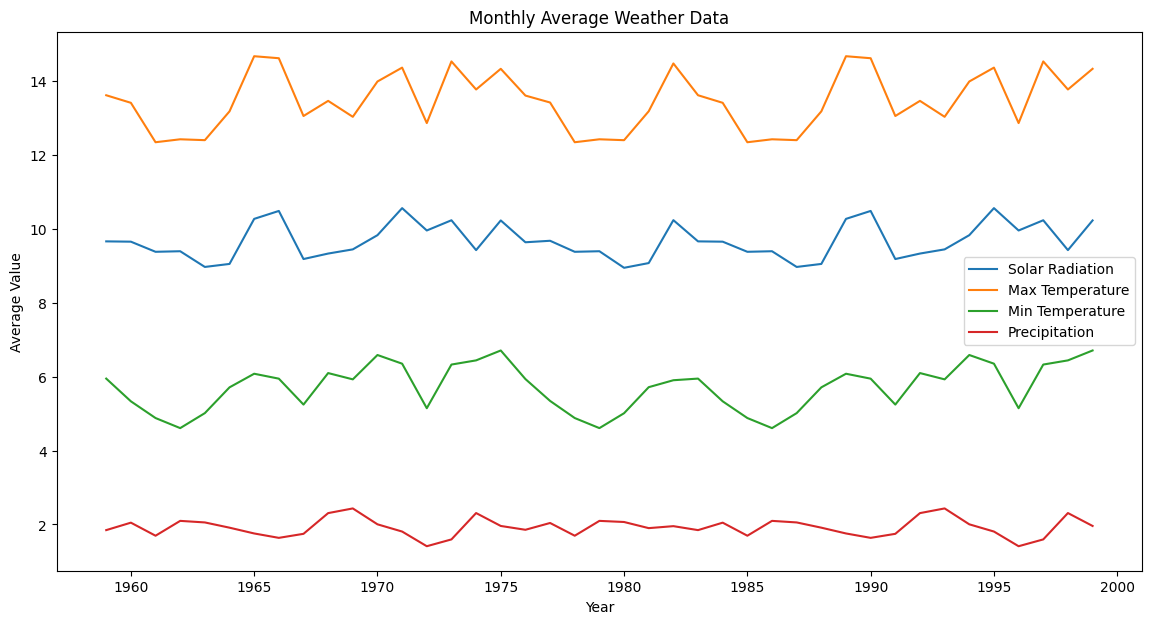

In [8]:
# Plotting the monthly averages so the general data trends can be visualised.

# Group data by year and calculate monthly averages.
monthly_data = merged_data.groupby(merged_data.index.year).mean()

# Plot monthly averages.
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['SolarRadiation'], label='Solar Radiation')
plt.plot(monthly_data.index, monthly_data['MaxTemperature'], label='Max Temperature')
plt.plot(monthly_data.index, monthly_data['MinTemperature'], label='Min Temperature')
plt.plot(monthly_data.index, monthly_data['Precipitation'], label='Precipitation')
plt.title('Monthly Average Weather Data')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.show()

In [9]:
merged_data.describe()

,SolarRadiation,MaxTemperature,MinTemperature,Precipitation
count,14975.000000,14975.000000,14975.000000,14975.000000
mean,9.666230,13.458518,5.707319,1.922538
std,7.337418,6.493785,5.057465,4.160682
min,0.100000,-7.200000,-13.600000,0.000000
25%,3.300000,8.800000,2.000000,0.000000
50%,7.900000,13.000000,5.900000,0.100000
75%,14.900000,18.200000,9.600000,1.900000
max,31.200000,33.800000,19.000000,64.400000


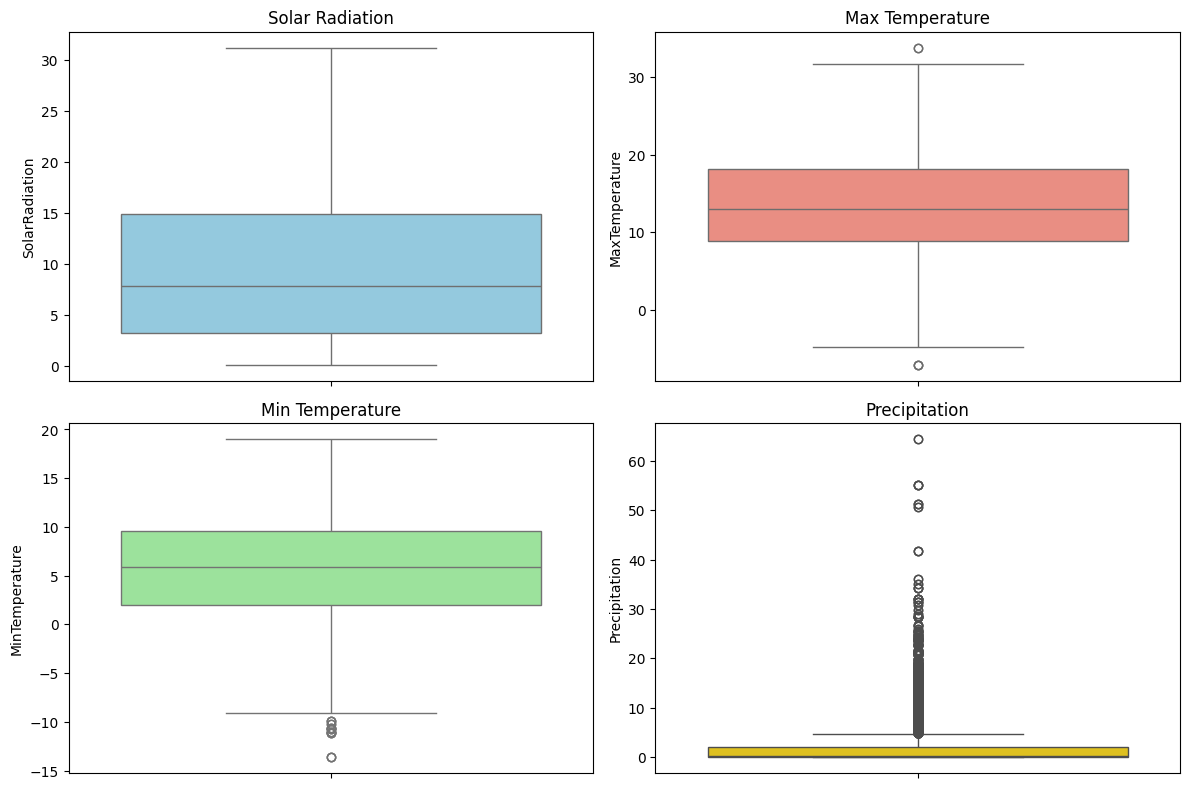

In [10]:
# Boxplots for each variable to show the visual distribution of each feature.

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(y=merged_data['SolarRadiation'], color='skyblue')
plt.title('Solar Radiation')

plt.subplot(2, 2, 2)
sns.boxplot(y=merged_data['MaxTemperature'], color='salmon')
plt.title('Max Temperature')

plt.subplot(2, 2, 3)
sns.boxplot(y=merged_data['MinTemperature'], color='lightgreen')
plt.title('Min Temperature')

plt.subplot(2, 2, 4)
sns.boxplot(y=merged_data['Precipitation'], color='gold')
plt.title('Precipitation')

plt.tight_layout()
plt.show()

In [11]:
# Defining a function to handle outliers using the interquartile range method. 
def handle_outliers_iqr(merged_data, columns, k=1.5, method='cap'):
    # Making a copy of the input data to avoid modifying the original dataframe.
    data = merged_data.copy()
    
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        
        if method == 'remove':
            data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
        elif method == 'cap':
            data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
        elif method == 'transform':
            data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return data

# Creating a copy of the data so the original dataframe is not modified.
final_data = merged_data.copy()

# Applying outlier handling function.
final_data = handle_outliers_iqr(merged_data, ['SolarRadiation', 'MaxTemperature', 'MinTemperature', 'Precipitation'], method='cap')

In [12]:
# Looking at summary statistics of the data to understand and see the effect of the IQR method.
# Outliers were successfully removed and resulted in a lower mean and 
# reduced variability, particularly in the Precipitation data, which had a significant number of extreme values.
final_data.describe()

,SolarRadiation,MaxTemperature,MinTemperature,Precipitation
count,14975.000000,14975.000000,14975.000000,14975.000000
mean,9.666230,13.458698,5.709529,1.181439
std,7.337418,6.492025,5.050324,1.763196
min,0.100000,-5.300000,-9.400000,0.000000
25%,3.300000,8.800000,2.000000,0.000000
50%,7.900000,13.000000,5.900000,0.100000
75%,14.900000,18.200000,9.600000,1.900000
max,31.200000,32.300000,19.000000,4.750000


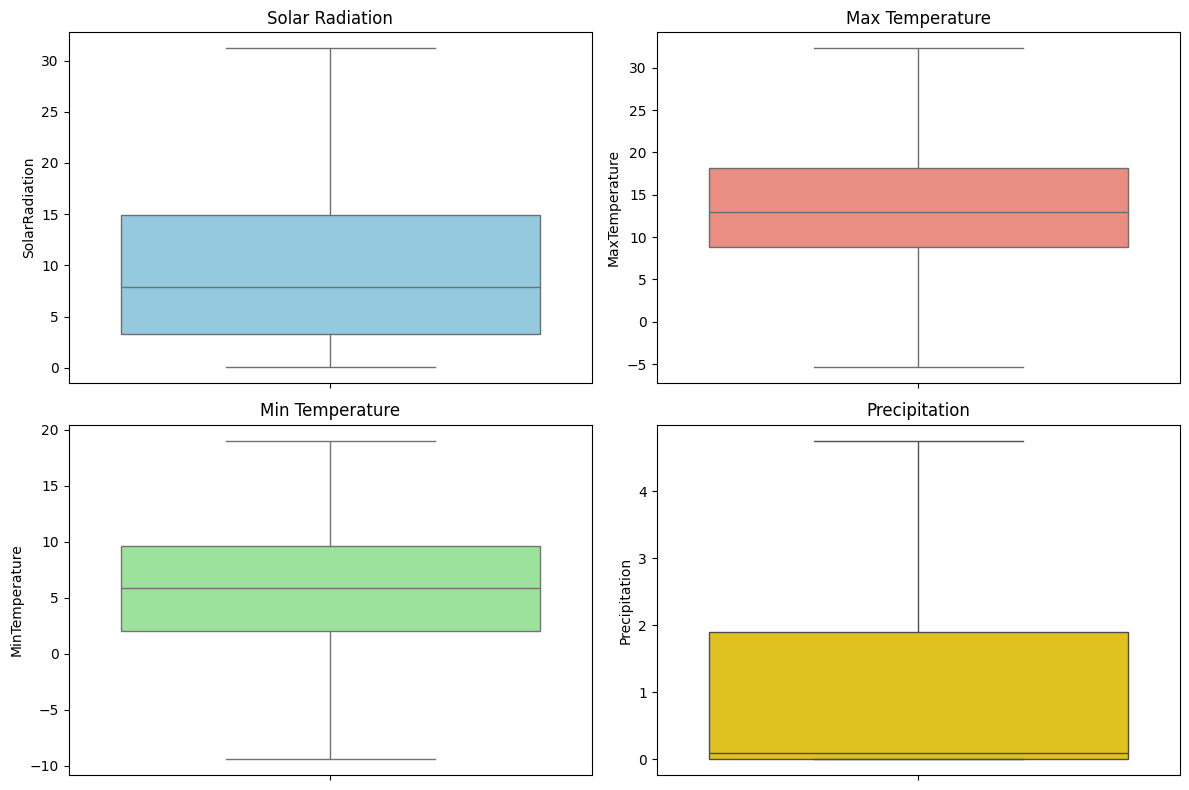

In [13]:
# Visualise the boxplot to visually show the distribution after applying the IQR method, reflecting the reduced
# outlier presence.

# Boxplots for each variable
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(y=final_data['SolarRadiation'], color='skyblue')
plt.title('Solar Radiation')

plt.subplot(2, 2, 2)
sns.boxplot(y=final_data['MaxTemperature'], color='salmon')
plt.title('Max Temperature')

plt.subplot(2, 2, 3)
sns.boxplot(y=final_data['MinTemperature'], color='lightgreen')
plt.title('Min Temperature')

plt.subplot(2, 2, 4)
sns.boxplot(y=final_data['Precipitation'], color='gold')
plt.title('Precipitation')

plt.tight_layout()
plt.show()

## Feature Engineering

In [14]:
# Creating lag features to incorporate temporal dependency.
# Shift columns by 7 days to create new features for the previous week.
# The maximum temperature column is also being shifted by 1 day to create a new feature for the previous day. 

final_data['PWEEK_SRAD'] = final_data['SolarRadiation'].shift(7) # Shift by 7 days.
final_data['PWEEK_TMAX'] = final_data['MaxTemperature'].shift(7)  
final_data['PWEEK_TMIN'] = final_data['MinTemperature'].shift(7) 
final_data['PWEEK_RAIN'] = final_data['Precipitation'].shift(7)
final_data['P_DAY_TMAX'] = final_data['MaxTemperature'].shift(1)  # Shift by 1 day.

# Drop rows with NaN values that will have been created by shifting the data.
final_data.dropna(inplace=True)

# Print the first 5 rows of the updated dataframe to verify the changes.
final_data.head()

,SolarRadiation,MaxTemperature,MinTemperature,Precipitation,PWEEK_SRAD,PWEEK_TMAX,PWEEK_TMIN,PWEEK_RAIN,P_DAY_TMAX
@DATE,,,,,,,,,
1997-01-08,0.9,-1.5,-3.3,0.3,3.7,-2.1,-6.1,0.0,-1.3
1997-01-09,1.5,-0.4,-2.9,0.8,5.4,-0.7,-5.9,0.0,-1.5
1997-01-10,1.4,0.0,-1.5,0.0,0.8,-0.4,-5.5,0.0,-0.4
1997-01-11,1.1,6.0,-2.3,0.8,1.0,0.6,-3.2,0.3,0.0
1997-01-12,1.2,7.0,0.0,0.2,1.7,1.2,-1.4,0.0,6.0


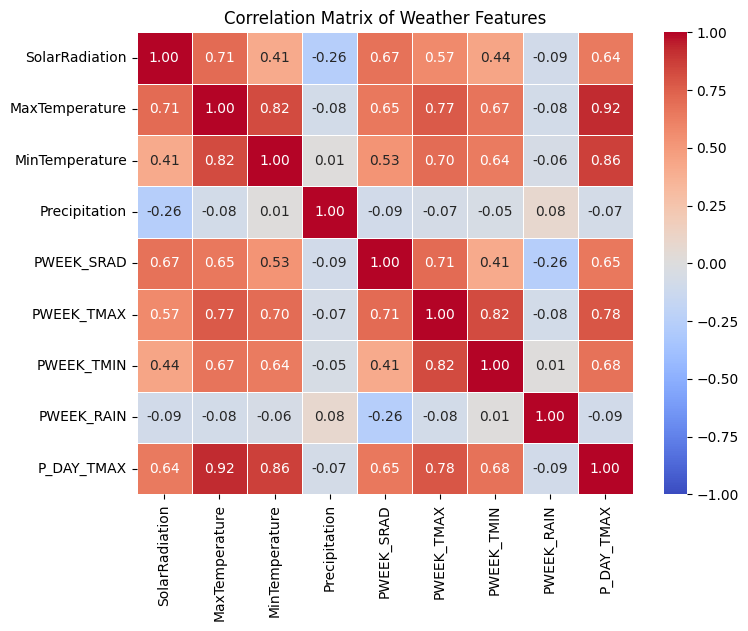

In [15]:
# Calculate the correlation matrix to display the correlation coefficients between the variables. This is to understand
# the strength of the relationships between the variables and understand how they are related to each other.

corr_matrix = final_data.corr()

# Set up the figure.
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)

# Add title.
plt.title('Correlation Matrix of Weather Features')

# Show plot.
plt.show()

### Splitting the dataset and performing normalisation.

In [16]:
# Define the features and target variable.
x_tmax = final_data[['PWEEK_TMAX', 'PWEEK_SRAD', 'PWEEK_TMIN', 'PWEEK_RAIN', 'P_DAY_TMAX']]
y_tmax = final_data['MaxTemperature']

# Determine the split index.
split_index = int(len(final_data) * 0.8)  # Using 80% for training and 20% for testing.

# Split the data into training and testing sets.
X_train = x_tmax[:split_index]
X_test = x_tmax[split_index:]
y_train = y_tmax[:split_index]
y_test = y_tmax[split_index:]

# Initialise MinMaxScaler for the features.
scaler_X = MinMaxScaler()

# Apply MinMax scaling to the feature training data and transform the test data.
X_train_scaled = pd.DataFrame(scaler_X.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler_X.transform(X_test), columns=X_test.columns)

# Initialise a separate MinMaxScaler for the target variable.
scaler_y = MinMaxScaler()

# Apply MinMax scaling to the target variable (y_train) and transform y_test.
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# y_train_scaled and y_test_scaled will be in 2D arrays after transformation
# To remain as 1D arrays, they have been flattened.
y_train = y_train_scaled.flatten()
y_test = y_test_scaled.flatten()

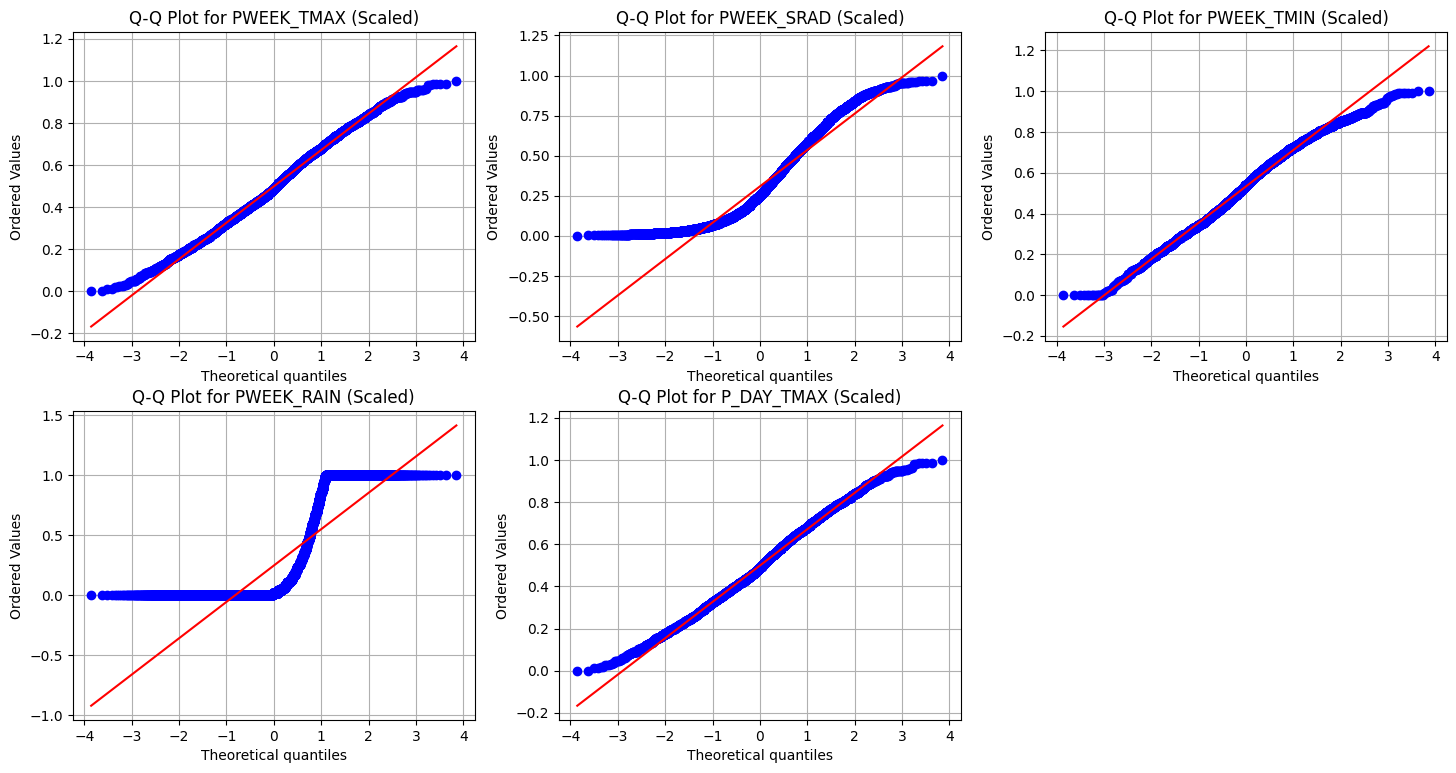

In [17]:
# Define features for scaled data.
scaled_features = X_train_scaled.columns
original_features = 'SolarRadiation', 'MaxTemperature', 'MinTemperature', 'Precipitation'

# Define the number of rows and columns for subplots.
n_original = len(original_features)
n_scaled = len(scaled_features)
cols = 3  
rows_original = (n_original + cols - 1) // cols
rows_scaled = (n_scaled + cols - 1) // cols

# Create a figure with subplots for scaled features.
fig_scaled, axes_scaled = plt.subplots(rows_scaled, cols, figsize=(15, 4 * rows_scaled))
fig_scaled.tight_layout(pad=3.0)  

# Flatten the axes array for easy iteration.
axes_scaled = axes_scaled.flatten()

# Generate Q-Q plots for the scaled features.
for ax, feature in zip(axes_scaled, scaled_features):
    stats.probplot(X_train_scaled[feature].dropna(), dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot for {feature} (Scaled)')
    ax.grid(True)
    
for i in range(len(scaled_features), len(axes_scaled)):
    fig_scaled.delaxes(axes_scaled[i])

plt.show()

## Machine Learning Models
### Cross-validation was performed to evaluate whether each model generalises well to unseen data. Hyperparameter tuning was also performed to optimise the hyperparameters for each model.

### Linear Regression

In [18]:
# Simple linear regression model.
mlr_model = LinearRegression()

# Cross-validation
cv_scores = cross_val_score(mlr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  

print(f"Cross-Validated RMSE: {cv_rmse_scores.mean()} +/- {cv_rmse_scores.std()}")

# Training the model.
mlr_model.fit(X_train_scaled, y_train)

# Predicting by evaluation data.
y_pred = mlr_model.predict(X_test_scaled)

# Metric evaluations.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Cross-Validated RMSE: 0.06402500728712265 +/- 0.0009245950667840991
Mean Squared Error (MSE): 0.004136597936993399
Root Mean Squared Error: 0.0643163893342389
Mean Absolute Error (MAE): 0.0499239693084156


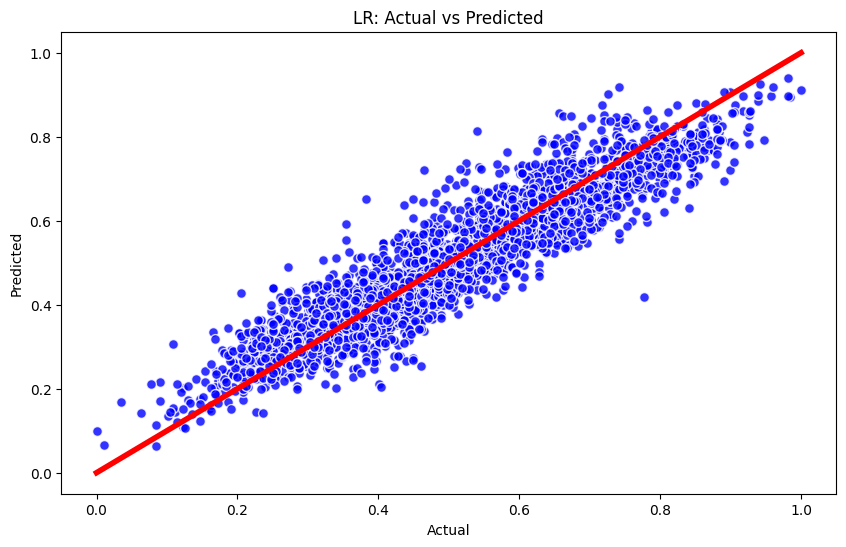

In [19]:
# Creating the scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.8, edgecolor='w', s=50)  

# Add the identity line with a lighter colour and reduced line width.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=4)  

# Label the axes and add a title.
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LR: Actual vs Predicted')

# Show the plot.
plt.show()

### Support Vector Regression

In [20]:
# Define the support vector regression model.
svr_model = SVR()

# Define the parameter grid for hyperparameter tuning.
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  
    'C': [1, 10],                 
    'gamma': ['scale']            
}

# Perform Grid Search with cross-validation.
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train) 
best_params = grid_search.best_params_
best_svr_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

# Perform cross-validation with the best SVR model.
cv_scores = cross_val_score(best_svr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  

print(f"Cross-Validated RMSE: {cv_rmse_scores.mean()} +/- {cv_rmse_scores.std()}")

# Predicting using the optimised SVR model.
y_pred = best_svr_model.predict(X_test_scaled)

# Metrics evaluations.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Best parameters found: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Cross-Validated RMSE: 0.06431732883822242 +/- 0.0008550978879359199
Mean Squared Error (MSE): 0.004174411239293149
Root Mean Squared Error: 0.06460968378883424
Mean Absolute Error (MAE): 0.05051401958709081


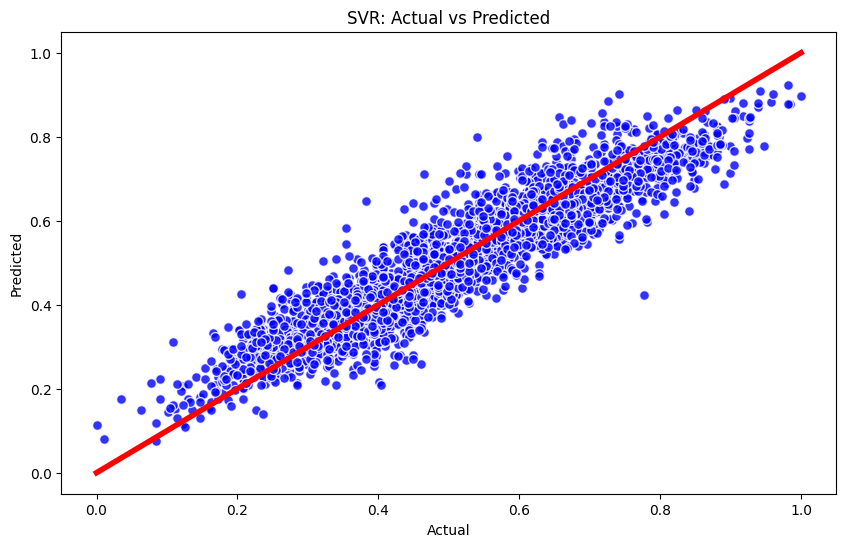

In [21]:
# Creating the scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.8, edgecolor='w', s=50)  

# Add the identity line with a lighter colour and reduced line width.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=4)  

# Label the axes and add a title.
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR: Actual vs Predicted')

# Show the plot.
plt.show()

### AdaBoost

In [22]:
# Define the AdaBoost model.
ada_model = AdaBoostRegressor()

# Define the parameter distribution for randomised search.
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'loss': ['linear', 'square', 'exponential']
}

# Perform Randomised Search with cross-validation.
random_search = RandomizedSearchCV(
    ada_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings sampled
    cv=5,       # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and model.
best_params = random_search.best_params_
best_ada_model = random_search.best_estimator_

print(f"Best parameters found: {best_params}")

# Perform additional cross-validation with the best AdaBoost model.
cv_scores = cross_val_score(best_ada_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Convert from negative MSE to positive RMSE

print(f"Cross-Validated RMSE: {cv_rmse_scores.mean()} +/- {cv_rmse_scores.std()}")

# Predicting using the optimised AdaBoost model.
y_pred = best_ada_model.predict(X_test_scaled)

# Metrics evaluations.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Best parameters found: {'n_estimators': 50, 'loss': 'linear', 'learning_rate': 0.1}
Cross-Validated RMSE: 0.06777805911203036 +/- 0.0015787256593026596
Mean Squared Error (MSE): 0.0044670421338691944
Root Mean Squared Error (RMSE): 0.06683593445048251
Mean Absolute Error (MAE): 0.052456672306834734


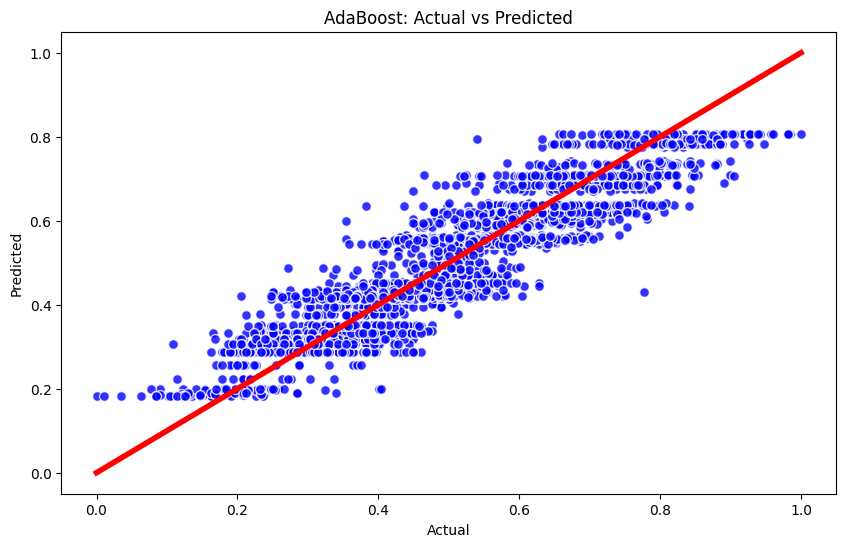

In [23]:
# Create the scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.8, edgecolor='w', s=50)  

# Add the identity line with a lighter colour and reduced line width.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=4)  

# Label the axes and add a title.
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('AdaBoost: Actual vs Predicted')

# Show the plot.
plt.show()

### Random Forest Regressor 

In [24]:
# Define the Random Forest model.
rf_model = RandomForestRegressor()

# Define the parameter distribution for randomised search.
param_dist = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [None, 10, 20, 30],     # Depth of trees
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum samples required to be at a leaf node
}

# Perform Randomised Search with cross-validation.
random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions=param_dist,
    n_iter=10,                # Number of parameter settings sampled
    cv=3,                     # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and model.
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

print(f"Best parameters found: {best_params}")

# Perform additional cross-validation with the best Random Forest model.
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Convert from negative MSE to positive RMSE

print(f"Cross-Validated RMSE: {cv_rmse_scores.mean()} +/- {cv_rmse_scores.std()}")

# Predicting using the optimised Random Forest model.
y_pred = best_rf_model.predict(X_test_scaled)

# Metrics evaluations
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Best parameters found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Cross-Validated RMSE: 0.05500307918960402 +/- 0.007937189273941396
Mean Squared Error (MSE): 0.0004921581581802253
Root Mean Squared Error (RMSE): 0.022184637887065574
Mean Absolute Error (MAE): 0.013462941137871684


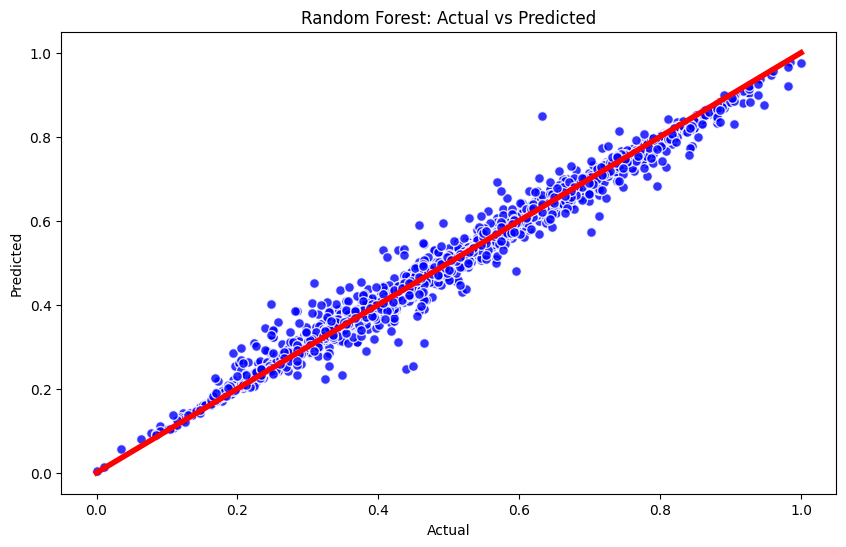

In [25]:
# Creating the scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.8, edgecolor='w', s=50)  

# Add the identity line with a lighter color and reduced line width.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=4)  

# Label the axes and add a title.
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')

# Show the plot.
plt.show()

### Gradient Boosting Regressor 

In [26]:
# Define the Gradient Boosting model.
gbm_model = GradientBoostingRegressor()

# Define the parameter distribution for randomised search.
param_dist = {
    'n_estimators': [100, 200, 300],       # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],     # Step size
    'max_depth': [3, 5, 7],                # Maximum depth of individual trees
    'subsample': [0.8, 0.9, 1.0]           # Fraction of samples used for fitting individual base learners
}

# Perform Randomised Search with cross-validation.
random_search = RandomizedSearchCV(
    gbm_model, 
    param_distributions=param_dist, 
    n_iter=10,                  # Number of parameter settings sampled
    cv=3,                       # 3-fold cross-validation during the search
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and model.
best_params = random_search.best_params_
best_gbm_model = random_search.best_estimator_

print(f"Best parameters found: {best_params}")

# Perform additional cross-validation with the best Gradient Boosting model.
cv_scores = cross_val_score(best_gbm_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Convert from negative MSE to positive RMSE

print(f"Cross-Validated RMSE: {cv_rmse_scores.mean()} +/- {cv_rmse_scores.std()}")

# Predicting using the optimised Gradient Boosting model.
y_pred = best_gbm_model.predict(X_test_scaled)

# Metrics evaluations.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Best parameters found: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2}
Cross-Validated RMSE: 0.060837451732130975 +/- 0.005965408213835024
Mean Squared Error (MSE): 0.0015089993954165413
Root Mean Squared Error (RMSE): 0.038845841417280966
Mean Absolute Error (MAE): 0.029572218063984544


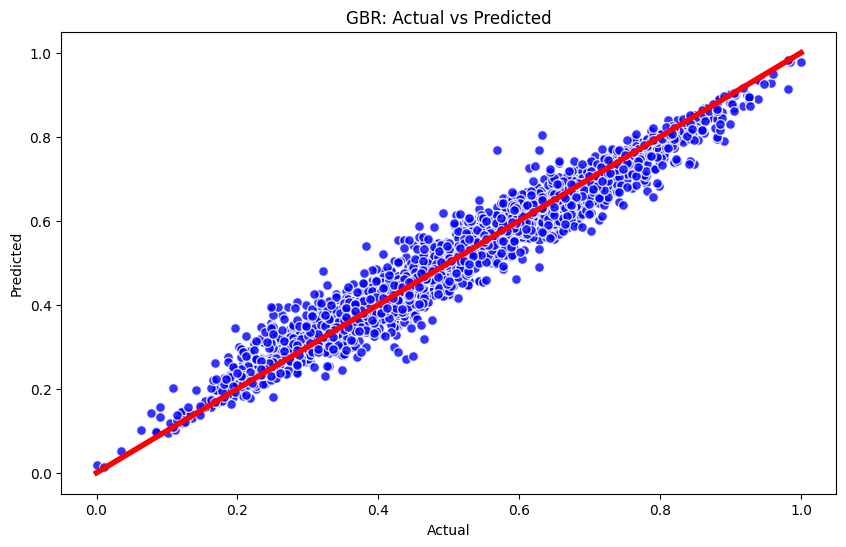

In [27]:
# Creating the scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.8, edgecolor='w', s=50)  

# Add the identity line with a lighter colour and reduced line width.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=4)  

# Label the axes and add a title.
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('GBR: Actual vs Predicted')

# Show the plot.
plt.show()

## Deep Learning Models

### Convolutional Neural Network.

In [28]:
# The DL models were processed on a separate notebook and added to here for simplicity. 
# Shift columns by 7 days to create new features for the previous week 
# The maximum temperature column is also being shifted by 1 day to create a new feature for the previous day. 

final_data['PWEEK_SRAD'] = final_data['SolarRadiation'].shift(7) # Shift by 7 days
final_data['PWEEK_TMAX'] = final_data['MaxTemperature'].shift(7)  
final_data['PWEEK_TMIN'] = final_data['MinTemperature'].shift(7) 
final_data['PWEEK_RAIN'] = final_data['Precipitation'].shift(7) 
final_data['P_DAY_TMAX'] = final_data['MaxTemperature'].shift(1)  # Shift by 1 day

# Drop rows with NaN values that will have been created by shifting the data.
final_data.dropna(inplace=True)

# Define the features and target variable
x_tmax = final_data[['PWEEK_TMAX', 'PWEEK_SRAD', 'PWEEK_TMIN']]
y_tmax = final_data['MaxTemperature']

# Initialise the MinMaxScaler.
scaler = MinMaxScaler()

# Apply MinMax scaling to the features.
x_tmax_scaled = pd.DataFrame(scaler.fit_transform(x_tmax), columns=x_tmax.columns)
y_tmax_scaled = pd.Series(scaler.fit_transform(y_tmax.values.reshape(-1, 1)).ravel(), name='MaxTemperature')

In [29]:
# Reshape data for CNN.
X_scaled = np.expand_dims(x_tmax_scaled, axis=2)  # Add a channel dimension.

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_tmax_scaled, test_size=0.2, random_state=42)

### Simple CNN

In [30]:
# Build the CNN model.
model = Sequential()

# Add CNN layers with padding to avoid dimension issues.
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())

# Add Dense layers with dropout for regularisation.
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularisation
model.add(Dense(1))

# Compile the model.
model.compile(optimizer='adam', loss='mse', metrics=[MeanAbsoluteError()])

# Display model summary.
model.summary()

# Set up callbacks.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model.
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1  # Set verbose=1 to get progress updates
)
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Absolute Error on test set: {mae:.4f}')

# Predict using the model
y_pred = model.predict(X_test)

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1  # Set verbose=1 to get progress updates
)

# Evaluate the model on the test set
results = model.evaluate(X_test, y_test, verbose=0)
loss = results[0]
mae = results[1]

# Predict using the model
y_pred = model.predict(X_test)

# Calculate additional metrics manually
mse_manual = mean_squared_error(y_test, y_pred)
rmse_manual = np.sqrt(mse_manual)

print(f'Loss on test set: {loss:.4f}')
print(f'Mean Absolute Error on test set: {mae:.4f}')
print(f'Mean Squared Error (Manual) on test set: {mse_manual:.4f}')
print(f'Root Mean Squared Error (Manual) on test set: {rmse_manual:.4f}')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 3, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,785 (57.75 KB)

 Trainable params: 14,785 (57.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - loss: 0.0332 - mean_absolute_error: 0.1348 - val_loss: 0.0111 - val_mean_absolute_error: 0.0845 - learning_rate: 0.0010
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.0153 - mean_absolute_error: 0.0985 - val_loss: 0.0117 - val_mean_absolute_error: 0.0858 - learning_rate: 0.0010
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0111 - val_mean_absolute_error: 0.0837 - learning_rate: 0.0010
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.0131 - mean_absolute_error: 0.0909 - val_loss: 0.0107 - val_mean_absolute_error: 0.0828 - learning_rate: 0.0010
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 0.0123 - mean_absolute_error: 0.0889 - val_loss: 0.0109 - val_mean_absolute_error: 0.0830 - learning_rate: 0.0010
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.0117 - mean_absolute_error: 0.0863 - val_loss: 0.0107 - 

### CNN with k-fold validation.

In [31]:
# Reshape data for CNN.
X_scaled = np.expand_dims(x_tmax_scaled, axis=2)  # Add channel dimension

# Define a function to create the CNN model.
def create_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=[MeanAbsoluteError()])
    return model

# Function for training and evaluating the model.
def train_and_evaluate(X_train, y_train, X_val, y_val):
    model = create_model((X_train.shape[1], 1))
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
    
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )
    
    loss, mae = model.evaluate(X_val, y_val, verbose=0)
    y_pred = model.predict(X_val)
    
    mse_manual = mean_squared_error(y_val, y_pred)
    rmse_manual = np.sqrt(mse_manual)
    
    return loss, mae, mse_manual, rmse_manual

# Initialise KFold.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

all_losses, all_maes, all_mses, all_rmses = [], [], [], []

for fold, (train_index, val_index) in enumerate(kf.split(X_scaled), 1):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_tmax_scaled[train_index], y_tmax_scaled[val_index]
    
    print(f"Training fold {fold}...")
    
    loss, mae, mse_manual, rmse_manual = train_and_evaluate(X_train, y_train, X_val, y_val)
    
    all_losses.append(loss)
    all_maes.append(mae)
    all_mses.append(mse_manual)
    all_rmses.append(rmse_manual)
    
    print(f"Fold {fold} - Loss: {loss:.4f}, MAE: {mae:.4f}, MSE (Manual): {mse_manual:.4f}, RMSE (Manual): {rmse_manual:.4f}")

# Average performance metrics.
print(f"\nAverage Loss: {np.mean(all_losses):.4f}")
print(f"Average MAE: {np.mean(all_maes):.4f}")
print(f"Average MSE (Manual): {np.mean(all_mses):.4f}")
print(f"Average RMSE (Manual): {np.mean(all_rmses):.4f}")

Training fold 1...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
Fold 1 - Loss: 0.0104, MAE: 0.0812, MSE (Manual): 0.0104, RMSE (Manual): 0.1018
Training fold 2...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
Fold 2 - Loss: 0.0103, MAE: 0.0803, MSE (Manual): 0.0103, RMSE (Manual): 0.1014
Training fold 3...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step
Fold 3 - Loss: 0.0102, MAE: 0.0814, MSE (Manual): 0.0102, RMSE (Manual): 0.1010
Training fold 4...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
Fold 4 - Loss: 0.0103, MAE: 0.0814, MSE (Manual): 0.0103, RMSE (Manual): 0.1017
Training fold 5...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
Fold 5 - Loss: 0.0100, MAE: 0.0812, MSE (Manual): 0.0100, RMSE (Manual): 0.1001

Average Loss: 0.0102
Average MAE: 0.0811
Average MSE (Manual): 0.0102
Average RMSE (Manual): 0.1012


### CNN with hyperparameter tuning and k-fold validation.

In [32]:
# Reshape data for CNN.
X_scaled = np.expand_dims(x_tmax_scaled, axis=2)  # Add channel dimension

# Define a function to create the CNN model.
def create_model(hp):
    model = Sequential()
    model.add(Conv1D(
        filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size_1', values=[2, 3, 5]),
        activation='relu',
        padding='same',
        input_shape=(X_scaled.shape[1], 1)
    ))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(Conv1D(
        filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size_2', values=[2, 3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='mse',
        metrics=[MeanAbsoluteError()]
    )
    
    return model # Initialise the tuner.
tuner = kt.RandomSearch(
    create_model,
    objective='val_loss',
    max_trials=5,  
    executions_per_trial=1,
    directory='my_dir',
    project_name='cnn_hyperparameter_tuning'
)

# Perform hyperparameter search.
tuner.search(X_scaled, y_tmax_scaled, epochs=50, validation_split=0.2,
             callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# Get the optimal hyperparameters.
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Fetch and print each hyperparameter 
filters_1 = best_hps.get('filters_1')
kernel_size_1 = best_hps.get('kernel_size_1')
filters_2 = best_hps.get('filters_2')
kernel_size_2 = best_hps.get('kernel_size_2')
dense_units = best_hps.get('dense_units')  
dropout = best_hps.get('dropout')
optimizer = best_hps.get('optimizer')

print(f"Best hyperparameters: filters_1={filters_1}, kernel_size_1={kernel_size_1}, "
      f"filters_2={filters_2}, kernel_size_2={kernel_size_2}, "
      f"dense_units={dense_units}, dropout={dropout}, optimizer={optimizer}")

# Function for training and evaluating the model with the best hyperparameters.
def train_and_evaluate(X_train, y_train, X_val, y_val, best_hps):
    model = tuner.hypermodel.build(best_hps)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
    
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )
    
    loss, mae = model.evaluate(X_val, y_val, verbose=0)
    y_pred = model.predict(X_val)
    
    mse_manual = mean_squared_error(y_val, y_pred)
    rmse_manual = np.sqrt(mse_manual)
    
    return loss, mae, mse_manual, rmse_manual # Initialise KFold for cross-validation.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

all_losses, all_maes, all_mses, all_rmses = [], [], [], []

for fold, (train_index, val_index) in enumerate(kf.split(X_scaled), 1):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_tmax_scaled[train_index], y_tmax_scaled[val_index]
    print(f"Training fold {fold}...")
    
    loss, mae, mse_manual, rmse_manual = train_and_evaluate(X_train, y_train, X_val, y_val, best_hps)
    
    all_losses.append(loss)
    all_maes.append(mae)
    all_mses.append(mse_manual)
    all_rmses.append(rmse_manual)
    
    print(f"Fold {fold} - Loss: {loss:.4f}, MAE: {mae:.4f}, MSE (Manual): {mse_manual:.4f}, RMSE (Manual): {rmse_manual:.4f}")

# Average performance metrics.
print(f"\nAverage Loss: {np.mean(all_losses):.4f}")
print(f"Average MAE: {np.mean(all_maes):.4f}")
print(f"Average MSE (Manual): {np.mean(all_mses):.4f}")
print(f"Average RMSE (Manual): {np.mean(all_rmses):.4f}")

Reloading Tuner from my_dir/cnn_hyperparameter_tuning/tuner0.json
Best hyperparameters: filters_1=32, kernel_size_1=3, filters_2=32, kernel_size_2=2, dense_units=192, dropout=0.3, optimizer=adam
Training fold 1...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
Fold 1 - Loss: 0.0104, MAE: 0.0815, MSE (Manual): 0.0104, RMSE (Manual): 0.1021
Training fold 2...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
Fold 2 - Loss: 0.0101, MAE: 0.0800, MSE (Manual): 0.0101, RMSE (Manual): 0.1006
Training fold 3...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
Fold 3 - Loss: 0.0102, MAE: 0.0817, MSE (Manual): 0.0102, RMSE (Manual): 0.1012
Training fold 4...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
Fold 4 - Loss: 0.0105, MAE: 0.0821, MSE (Manual): 0.0105, RMSE (Manual): 0.1024
Training fold 5...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
Fold 5 - Loss: 0.0100, MAE: 0.0811, MSE (Manual): 0.0100, RMSE (Manual): 0.0999

Average Loss: 0.0102
Average MAE: 0.0813
Average MSE (Manual): 0.0103
Average RMSE (Manual): 0.1012


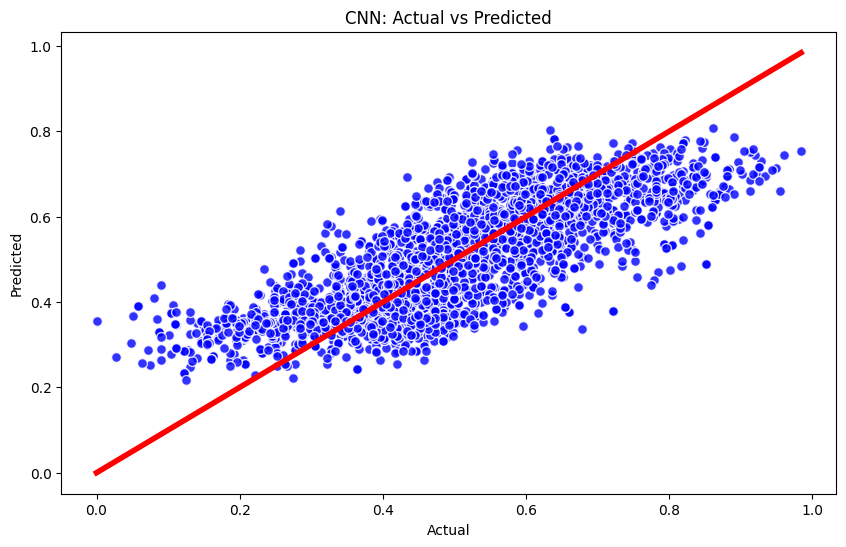

In [33]:
# Creating the scatter plot.

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.8, edgecolor='w', s=50)  # Adjust transparency with alpha and add edge color

# Add the identity line with a lighter colour and reduced line width.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=4)  # Use dashed line and thinner width

# Label the axes and add a title.
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CNN: Actual vs Predicted')

# Show the plot.
plt.show()

### LTSM

In [34]:
# Define the model-building function for hyperparameter tuning.
def build_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),
        activation='relu',
        input_shape=(X_scaled.shape[1], 1),
        return_sequences=True
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32),
        activation='relu',
        return_sequences=False
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),
        loss='mse',
        metrics=[MeanAbsoluteError()]
    )
    
    return model

# Initialise KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_losses, all_maes, all_mses, all_rmses = [], [], [], []

# Containers for best hyperparameters
hyperparameters_list = []

for fold, (train_index, val_index) in enumerate(kf.split(X_scaled), 1):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_tmax_scaled[train_index], y_tmax_scaled[val_index]
    
    print(f"Training fold {fold}...")
    
    # Set up Keras Tuner
    tuner = kt.Hyperband(
        build_model,
        objective='val_mean_absolute_error',
        max_epochs=50,
        hyperband_iterations=2,
        directory=f'my_dir_fold_{fold}',
        project_name='lstm_hyperparameter_tuning'
    )
    
    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

    # Perform hyperparameter search
    tuner.search(
        X_train, y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr]
    )

    # Get the best model
    best_model = tuner.get_best_models(num_models=1)[0]
    
    # Evaluate the model on the validation set
    loss, mae = best_model.evaluate(X_val, y_val, verbose=0)
    y_pred = best_model.predict(X_val)
    
    mse_manual = mean_squared_error(y_val, y_pred)
    rmse_manual = np.sqrt(mse_manual)

    all_losses.append(loss)
    all_maes.append(mae)
    all_mses.append(mse_manual)
    all_rmses.append(rmse_manual)
    
    print(f"Fold {fold} - Loss: {loss:.4f}, MAE: {mae:.4f}, MSE (Manual): {mse_manual:.4f}, RMSE (Manual): {rmse_manual:.4f}")

    # Collect the best hyperparameters for this fold
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    hyperparameters_list.append(best_hyperparameters.values)
    
    # Print the best hyperparameters for this fold
    print("Best Hyperparameters for Fold", fold)
    for key, value in best_hyperparameters.values.items():
        print(f"{key}: {value}")

# Average performance metrics across all folds
print(f"\nAverage Loss: {np.mean(all_losses):.4f}")
print(f"Average MAE: {np.mean(all_maes):.4f}")
print(f"Average MSE (Manual): {np.mean(all_mses):.4f}")
print(f"Average RMSE (Manual): {np.mean(all_rmses):.4f}")

# Determine the most common hyperparameters across all folds
# Flatten all hyperparameters to a list of tuples
flat_hyperparams = [tuple(sorted(hp.items())) for hp in hyperparameters_list]
most_common_hyperparams = Counter(flat_hyperparams).most_common(1)[0][0]

print("Overall Best Hyperparameters:")
for key, value in most_common_hyperparams:
    print(f"{key}: {value}")


Training fold 1...
Reloading Tuner from my_dir_fold_1/lstm_hyperparameter_tuning/tuner0.json


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras_tuner/src/tuners/hyperband.py:435: UserWarning: Model 'sequential' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  model.build_from_config(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/sa

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 1 - Loss: 0.0104, MAE: 0.0813, MSE (Manual): 0.0104, RMSE (Manual): 0.1020
Best Hyperparameters for Fold 1
units_1: 96
dropout_1: 0.2
units_2: 64
dropout_2: 0.4
optimizer: adam
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0080
Training fold 2...
Reloading Tuner from my_dir_fold_2/lstm_hyperparameter_tuning/tuner0.json


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras_tuner/src/tuners/hyperband.py:435: UserWarning: Model 'sequential' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  model.build_from_config(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/sa

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold 2 - Loss: 0.0101, MAE: 0.0798, MSE (Manual): 0.0101, RMSE (Manual): 0.1004
Best Hyperparameters for Fold 2
units_1: 64
dropout_1: 0.30000000000000004
units_2: 32
dropout_2: 0.2
optimizer: adam
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0157
Training fold 3...
Reloading Tuner from my_dir_fold_3/lstm_hyperparameter_tuning/tuner0.json


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras_tuner/src/tuners/hyperband.py:435: UserWarning: Model 'sequential' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  model.build_from_config(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/sa

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 3 - Loss: 0.0102, MAE: 0.0813, MSE (Manual): 0.0102, RMSE (Manual): 0.1009
Best Hyperparameters for Fold 3
units_1: 96
dropout_1: 0.2
units_2: 128
dropout_2: 0.2
optimizer: adam
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0068
Training fold 4...
Reloading Tuner from my_dir_fold_4/lstm_hyperparameter_tuning/tuner0.json


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras_tuner/src/tuners/hyperband.py:435: UserWarning: Model 'sequential' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  model.build_from_config(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/sa

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 4 - Loss: 0.0103, MAE: 0.0815, MSE (Manual): 0.0103, RMSE (Manual): 0.1017
Best Hyperparameters for Fold 4
units_1: 128
dropout_1: 0.30000000000000004
units_2: 64
dropout_2: 0.2
optimizer: adam
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0046
Training fold 5...
Reloading Tuner from my_dir_fold_5/lstm_hyperparameter_tuning/tuner0.json


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras_tuner/src/tuners/hyperband.py:435: UserWarning: Model 'sequential' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  model.build_from_config(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/sa

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 5 - Loss: 0.0100, MAE: 0.0812, MSE (Manual): 0.0100, RMSE (Manual): 0.1000
Best Hyperparameters for Fold 5
units_1: 96
dropout_1: 0.2
units_2: 96
dropout_2: 0.2
optimizer: adam
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0069

Average Loss: 0.0102
Average MAE: 0.0810
Average MSE (Manual): 0.0102
Average RMSE (Manual): 0.1010
Overall Best Hyperparameters:
dropout_1: 0.2
dropout_2: 0.4
optimizer: adam
tuner/bracket: 1
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/round: 1
tuner/trial_id: 0080
units_1: 96
units_2: 64


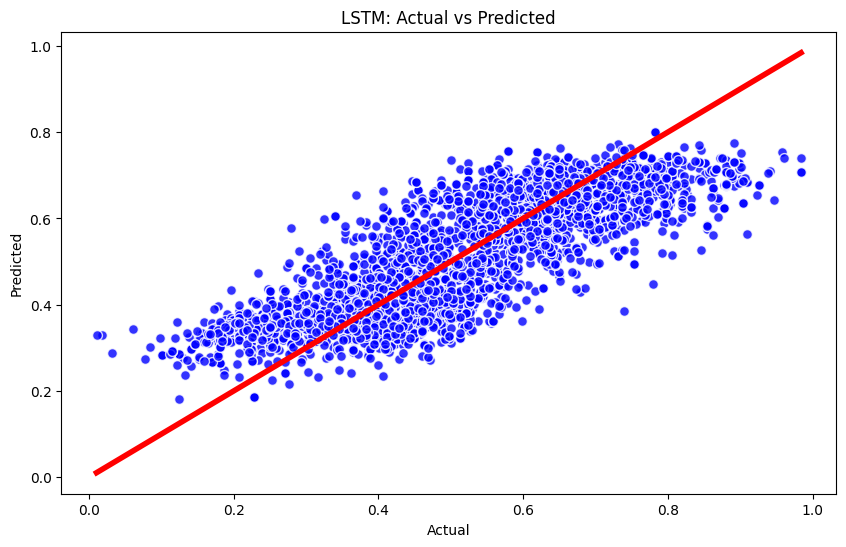

In [35]:
min_length = min(len(y_val), len(y_pred))
y_val = y_val[:min_length]
y_pred = y_pred[:min_length]

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.8, edgecolor='w', s=50)  
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r', lw=4)  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LSTM: Actual vs Predicted')
plt.show()

### RNN

In [ ]:
# Define the function to build the RNN model.
def build_model(hp):
    model = Sequential()
    model.add(SimpleRNN(
        units=hp.Int('units1', min_value=32, max_value=128, step=32),
        activation='relu',
        input_shape=(X_scaled.shape[1], 1),
        return_sequences=True
    ))
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(SimpleRNN(
        units=hp.Int('units2', min_value=32, max_value=128, step=32),
        activation='relu',
        return_sequences=False
    ))
    model.add(Dropout(rate=hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),
        loss='mse',
        metrics=[MeanAbsoluteError()]
    )
    
    return model

# Initialise KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

all_losses, all_maes, all_mses, all_rmses = [], [], [], []

for fold, (train_index, val_index) in enumerate(kf.split(X_scaled), 1):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_tmax_scaled[train_index], y_tmax_scaled[val_index]
    
    print(f"Training fold {fold}...")
    
    # Set up Keras Tuner
    tuner = kt.Hyperband(
        build_model,
        objective='val_loss',
        max_epochs=50,
        factor=3,
        directory=f'my_dir_fold_{fold}',
        project_name='rnn_tuning'
    )
    
    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

    # Perform the hyperparameter search
    tuner.search(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Get the best model for this fold
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    best_model = tuner.hypermodel.build(best_hps)
    
    # Train the best model
    history = best_model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    # Evaluate the model on the validation set
    loss, mae = best_model.evaluate(X_val, y_val, verbose=0)
    y_pred = best_model.predict(X_val)
    
    mse_manual = mean_squared_error(y_val, y_pred)
    rmse_manual = np.sqrt(mse_manual)

    all_losses.append(loss)
    all_maes.append(mae)
    all_mses.append(mse_manual)
    all_rmses.append(rmse_manual)
    
    print(f"Fold {fold} - Loss: {loss:.4f}, MAE: {mae:.4f}, MSE (Manual): {mse_manual:.4f}, RMSE (Manual): {rmse_manual:.4f}")

    # Print the best hyperparameters for this fold
    print("Best Hyperparameters for Fold", fold)
    for key, value in best_hps.values.items():
        print(f"{key}: {value}")

# Average performance metrics across all folds
print(f"\nAverage Loss: {np.mean(all_losses):.4f}")
print(f"Average MAE: {np.mean(all_maes):.4f}")
print(f"Average MSE (Manual): {np.mean(all_mses):.4f}")
print(f"Average RMSE (Manual): {np.mean(all_rmses):.4f}")

Training fold 1...
Reloading Tuner from my_dir_fold_1/rnn_tuning/tuner0.json
Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0316 - mean_absolute_error: 0.1247 - val_loss: 0.0108 - val_mean_absolute_error: 0.0825 - learning_rate: 0.0010
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0127 - mean_absolute_error: 0.0904 - val_loss: 0.0111 - val_mean_absolute_error: 0.0838 - learning_rate: 0.0010
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0118 - mean_absolute_error: 0.0867 - val_loss: 0.0105 - val_mean_absolute_error: 0.0818 - learning_rate: 0.0010
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0114 - mean_absolute_error: 0.0865 - val_loss: 0.0106 - val_mean_absolute_error: 0.0821 - learning_rate: 0.0010
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0116 - mean_absolute_error: 0.0867 - val_loss: 0.0105 - val_mean_absolute_error: 0.0818 - learning_rate: 0.0010
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0114 - mean_absolute_error: 0.0858 - val_loss: 0.0105 - val_mean_absolute_error

In [ ]:
min_length = min(len(y_val), len(y_pred))
y_val = y_val[:min_length]
y_pred = y_pred[:min_length]

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.8, edgecolor='w', s=50)  
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r', lw=4)  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RNN: Actual vs Predicted')
plt.show()

## Result visualisations

In [ ]:
# Model names
models = ['LR', 'SVR', 'AdaBoost', 'RF', 'GBR', 'CNN', 'LSTM', 'RNN']

# Values for the metrics
mse_values = [0.0041, 0.00418, 0.00446, 0.00049, 0.00151, 0.0103, 0.0105, 0.0102]
rmse_values = [0.0644, 0.0646, 0.0668, 0.0221, 0.0389, 0.1012, 0.1023, 0.1010]
mae_values = [0.0499, 0.0505, 0.0524, 0.0134, 0.0294, 0.0812, 0.0817, 0.0810]

# Cross-validated RMSE values and standard deviation
cv_rmse_means = [0.0640, 0.0643, 0.0675, 0.0549, 0.0611, None, None, None]
cv_rmse_stds = [0.00095, 0.00087, 0.00121, 0.00802, 0.00646, None, None, None]

# Average Losses for DL models
losses = [None, None, None, None, None, 0.0103, 0.0105, 0.0102]

# Creating the bar chart for MSE, RMSE, MAE
metrics = ['MSE', 'RMSE', 'MAE']
values = [mse_values, rmse_values, mae_values]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, ax in enumerate(axes):
    ax.bar(models, values[i], color='skyblue')
    ax.set_title(f'{metrics[i]} Comparison')
    ax.set_xlabel('Models')
    ax.set_ylabel(f'{metrics[i]}')
    # Add text on top of each bar
    for idx, val in enumerate(values[i]):
        ax.text(idx, val + 0.001, f'{val:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Plotting the cross-validated RMSE (only for ML models)
ml_models = ['LR', 'SVR', 'AdaBoost', 'RF', 'GBR']
cv_rmse_means_ml = cv_rmse_means[:5]
cv_rmse_stds_ml = cv_rmse_stds[:5]

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(ml_models, cv_rmse_means_ml, yerr=cv_rmse_stds_ml, capsize=5, color='lightcoral')
ax.set_title('Cross-Validated RMSE with Standard Deviation')
ax.set_xlabel('Models')
ax.set_ylabel('Cross-Validated RMSE')

# Add text on top of each bar
for idx, (mean_val, std_val) in enumerate(zip(cv_rmse_means_ml, cv_rmse_stds_ml)):
    ax.text(idx, mean_val + 0.001, f'{mean_val:.4f} ± {std_val:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Plotting the losses for DL models 
dl_models = ['CNN', 'LSTM', 'RNN']
dl_losses = losses[-3:]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(dl_models, dl_losses, color='mediumseagreen')
ax.set_title('Losses for Deep Learning Models')
ax.set_xlabel('Models')
ax.set_ylabel('Loss')

# Add text on top of each bar
for idx, val in enumerate(dl_losses):
    ax.text(idx, val + 0.001, f'{val:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()